# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. And from Part 2, BA Edition.
- Note: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network.

### Week 3 Part 1.a)
**Exercises: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.**

- **What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**  
  - There is more clustering in real-world networks that is not accounted for in a random network. A random network "underestimates the size and the frequency of high-degree nodes." The random network predicts many nodes close to ⟨k⟩, but in reality, many nodes have higher or lower degrees. Few nodes lie near the average.

- **List the four regimes that characterize random networks as a function of ⟨k⟩**  
If ⟨k⟩ > 1 we have a large component.
  - *Subcritical Regime*:  
    - $0 < ⟨k⟩ < 1 \quad (p < 1/N)$  
    - For ⟨k⟩ = 0 the network consists of N isolated nodes  
    - For ⟨k⟩ < 1 we observe many tiny clusters  
  - *Critical Point*:  
    - $⟨k⟩ = 1 \quad (p = 1/N)$  
    - The critical point separates the regime where there is not yet a giant component (⟨k⟩ < 1) from the regime where there is one (⟨k⟩ > 1)  
  - *Supercritical Regime*:  
    - $⟨k⟩ > 1 \quad (p > 1/N)$  
    - The network now has a giant component that looks like a real network  
    - Numerous isolated components coexist with the giant component  
    - The supercritical regime lasts until all nodes are absorbed by the giant component  
  - *Connected Regime*:  
    - $⟨k⟩ > \ln N \quad (p > \ln N / N)$  
    - For sufficiently large p the giant component absorbs all nodes, so $N_G \simeq N$  
    - The network becomes a complete graph only at ⟨k⟩ = N - 1, but it remains sparse until this point  

- **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?**  
  - In a random network, when the average degree of nodes decreases, clustering also decreases, since each connection is equally likely to go to a faraway node as to a nearby one.
  - In a real-world network, connecting to a neighbor or a neighbor’s neighbor still has a high probability. So even when the degree decreases (fewer connections), clusters persist. Connections are still made within the same local neighborhoods, just with fewer overall links.  


### Week 3 Part 1.b)
**Ercises: WS edition.**
- **First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,and 1**
- **Calculate the average shortest path length ⟨d⟩ for each one.**

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

n = 500
k = 4 # average degree, neighbours neighbour on each side
p = [0, 0.1, 1] # The probability of rewiring each edge

# create 3 graphs with different rewiring probabilities
G1 = nx.watts_strogatz_graph(n,k,p[0],seed=42)
G2 = nx.watts_strogatz_graph(n,k,p[1],seed=42)
G3 = nx.watts_strogatz_graph(n,k,p[2],seed=42)

# Calculate the average shortest path length ⟨d⟩ for each one
d1 = nx.average_shortest_path_length(G1)
d2 = nx.average_shortest_path_length(G2)
d3 = nx.average_shortest_path_length(G3)

# Print the results
print(f"Average shortest path length for p={p[0]}: {d1}")
print(f"Average shortest path length for p={p[1]}: {d2}")
print(f"Average shortest path length for p={p[2]}: {d3}")

Average shortest path length for p=0: 62.875751503006015
Average shortest path length for p=0.1: 8.340905811623246
Average shortest path length for p=1: 4.726845691382765


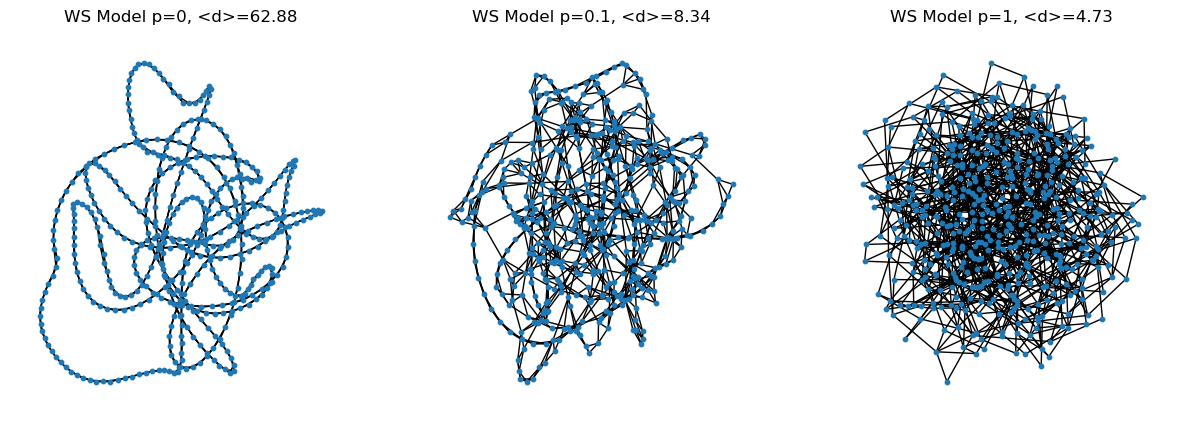

In [6]:
# plot the graphs
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
nx.draw(G1, node_size=10)
plt.title(f'WS Model p={p[0]}, <d>={d1:.2f}')
plt.subplot(1,3,2)
nx.draw(G2, node_size=10)
plt.title(f'WS Model p={p[1]}, <d>={d2:.2f}')
plt.subplot(1,3,3)
nx.draw(G3, node_size=10)
plt.title(f'WS Model p={p[2]}, <d>={d3:.2f}')
plt.show()

- **Describe what happens to the network when p=1**

For p = 1 all links have been rewired, so the network turns into a random network (Box 3.9)

- **Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0**

In [7]:
# Generate a lot of networks with different values of p
p = np.linspace(0.1, 1, 20)
avg_path_lengths = []
for prob in p:
    G = nx.watts_strogatz_graph(n, k, prob, seed=42)
    avg_path_length = nx.average_shortest_path_length(G)
    avg_path_lengths.append(avg_path_length)


- **What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network (value of 4-6 (see chapter 3.8-3.9)).**

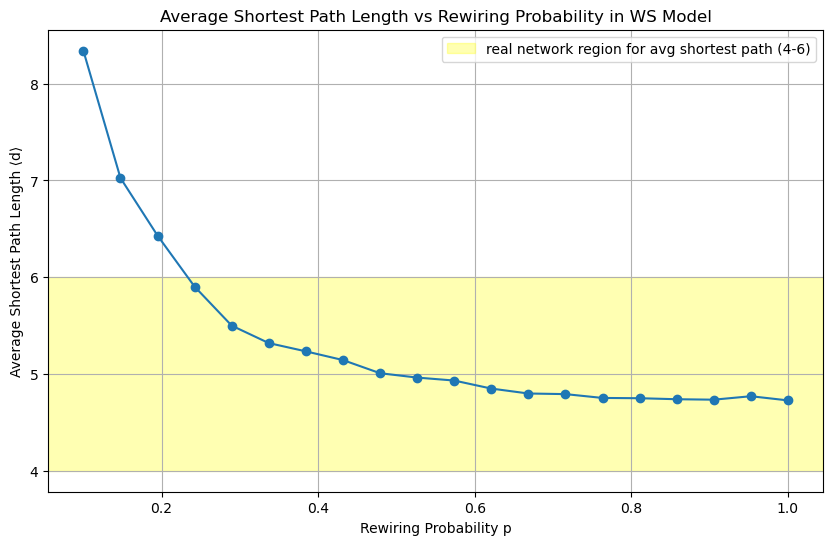

In [8]:
# Plot the average shortest path length as a function of p
plt.figure(figsize=(10, 6))
plt.plot(p, avg_path_lengths, marker='o')
plt.xlabel('Rewiring Probability p')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Model')
plt.grid()

# Mark the area between 4 and 6
plt.axhspan(4, 6, color='yellow', alpha=0.3, label='real network region for avg shortest path (4-6)')
plt.legend()

plt.show()

==TODO== answer the above! and write figure text!

- **Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}**

and

- **Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring.**

In [9]:
# Generate a lot of networks with different values of p
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_path_lengths = np.zeros((len(p), 50))
for idx, prob in enumerate(p):
    for i in range(50):
        G = nx.watts_strogatz_graph(n, k, prob, seed=None)
        avg_path_lengths[idx, i] = nx.average_shortest_path_length(G)

# Calculate mean and std deviation
mean_path_lengths = np.mean(avg_path_lengths, axis=1)
std_path_lengths = np.std(avg_path_lengths, axis=1)


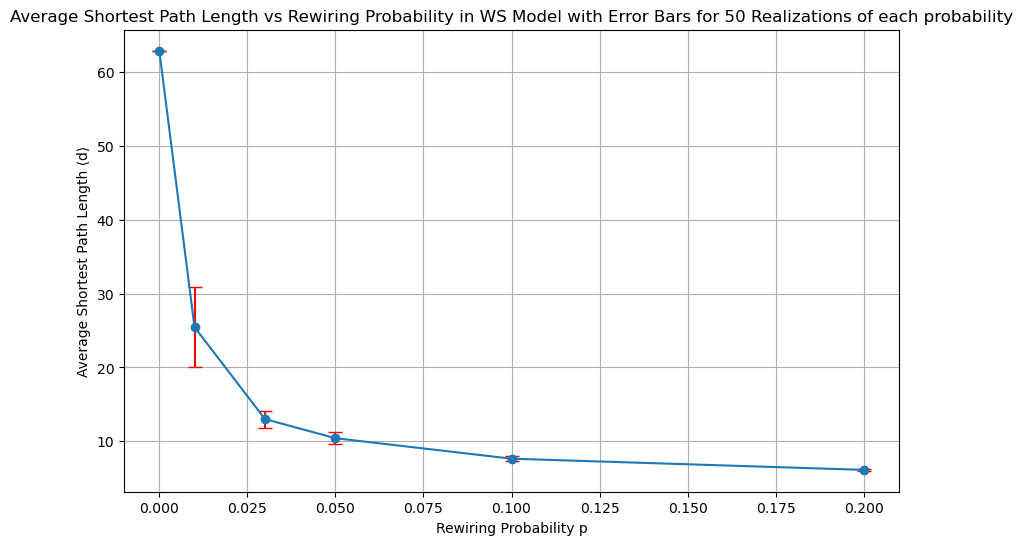

In [10]:
# Plot the average shortest path length as a function of p with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(p, mean_path_lengths, yerr=std_path_lengths, fmt='o-', capsize=5, ecolor='red')
plt.xlabel('Rewiring Probability p')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Model with Error Bars for 50 Realizations of each probability')
plt.grid()
plt.show()

- **Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.**

Average shortest path length ⟨d⟩ as a function of the rewiring probability p in the Watts–Strogatz (WS) model. The x-axis shows the rewiring probabilities (p = 0, 0.01, 0.03, 0.05, 0.1, 0.2), and the y-axis shows the average shortest path length between two random nodes. Each blue dot represents the mean value of ⟨d⟩ over 50 realizations of the network for each value of p. The red error bars indicate the standard deviation of ⟨d⟩ across these realizations.

The results show that introducing a tiny bit of "randomness" by making a small amount of rewiring (as little as 1%) drastically reduces the average shortest path length, nearly halving it compared going from p=0 to p=0.01. As p increases, both the mean path length and its variability decrease, as the network approach the behavior of a random network (at p=1). Even though this is the observation, we expect the clustering coefficient to still be high, and therefore not represent a random network. With even a small amount of pertubations of the links, we gain access to different places in the cluster, and therefore deminish the shortest destance to nodes further away. This is what is describes as the small-world effect.

### Week 3 Part 2.a)

**Exercises: BA edition.**
- **What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**
  - Anomalous Regime (γ ≤ 2)
    - The exponent $1/(γ−1)$ in (4.18), $k_{max} = k_{min} N^{1/(γ−1)}$, is larger than one. Hence, the number of links connected to the largest hub grows faster than the size of the network. This means that for sufficiently large $N$, the degree of the largest hub must exceed the total number of nodes in the network, so it will eventually run out of nodes to connect to.
    - hubs grow unrealistically fast and the model breaks down.
  - Scale-Free Regime (2 < γ < 3)
    - Ultra small world
    - For γ = 2, $k_{max} \sim N$
    - Here the mean of the degree distribution is finite, but higher moments such as the variance are not finite.  
    - scale-free networks with heavy tails; hubs dominate, variance diverges.
  - Random Network Regime (γ > 3)
    - Small world
    - Indistinguishable from a random network
    - For γ > 3 both the first and the second moments are finite.  
    - resembles a random network; hubs are less important, variance is finite.
- **What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**
  - Sublinear Preferential Attachment (0 < α < 1)
    - For any α > 0, new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, not sufficient to generate a scale-free degree distribution. Instead, in this regime the degrees follow a stretched exponential distribution.
    - weak bias, no scale-free structure; degree distribution is stretched exponential
  - Linear Preferential Attachment (α = 1)
    - Scale-free
    - This corresponds to the Barabási–Albert model, hence the degree distribution follows a power law.
    - classic BA model; power-law degree distribution, scale-free networks.
  - Superlinear Preferential Attachment (α > 1)
    - For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-get-richer process.
    - The earliest nodes become super hubs and all subsequent nodes link to them.
    - a few super-hubs capture almost all links


### Week 3 Part 2.b)
**Exercises: create our own Barabasi-Albert model**

Well documented code that shows how we create the network:

In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

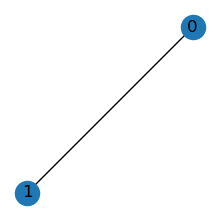

In [19]:
# single link graph
G = nx.Graph()
G.add_edge(0, 1)

# plot
plt.figure(figsize=(2,2))
nx.draw(G, with_labels=True)

In [20]:
# add 100 nodes, connecting one of the existing nodes in proportion to their degree

# Generate a list of all edges and flatten it
nodes = []
for edge in G.edges():
    for node in edge:
        nodes.append(node)

for new_node in range(2, 100):
    # Choose an existing node with probability proportional to its degree
    existing_node = random.choice(nodes)
    # Add the new node and connect it to the chosen existing node
    G.add_edge(new_node, existing_node)
    nodes.append(new_node)
    nodes.append(existing_node)

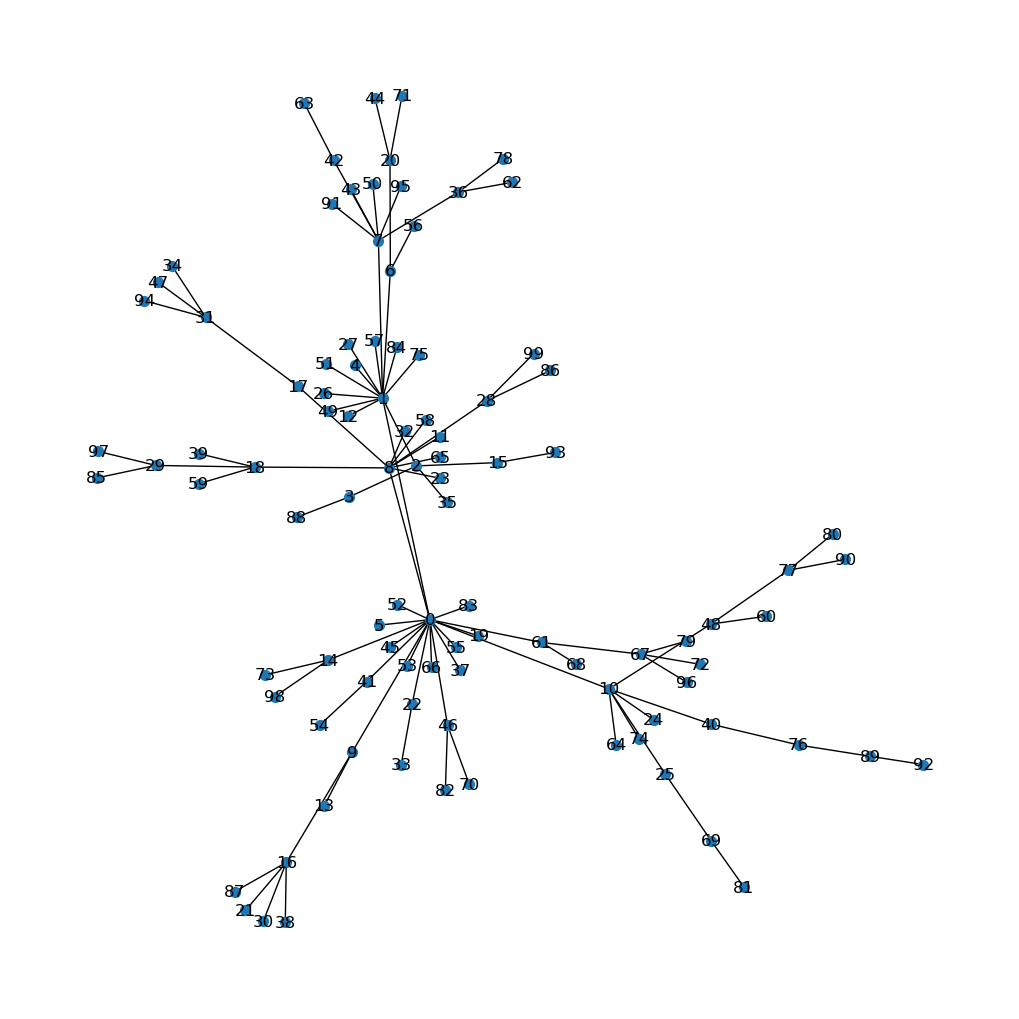

In [21]:
#Plot the network
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=50)
plt.show()

In [22]:
# Add more nodes until you have a 5000 node network.
for new_node in range(101, 5000):
    # Choose an existing node with probability proportional to its degree
    existing_node = random.choice(nodes)
    # Add the new node and connect it to the chosen existing node
    G.add_edge(new_node, existing_node)
    nodes.append(new_node)
    nodes.append(existing_node)

In [23]:
# What's the maximum and minimum degree?
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)
print(f"Maximum degree: {dmax}")
print(f"Minimum degree: {dmin}")

Maximum degree: 121
Minimum degree: 1


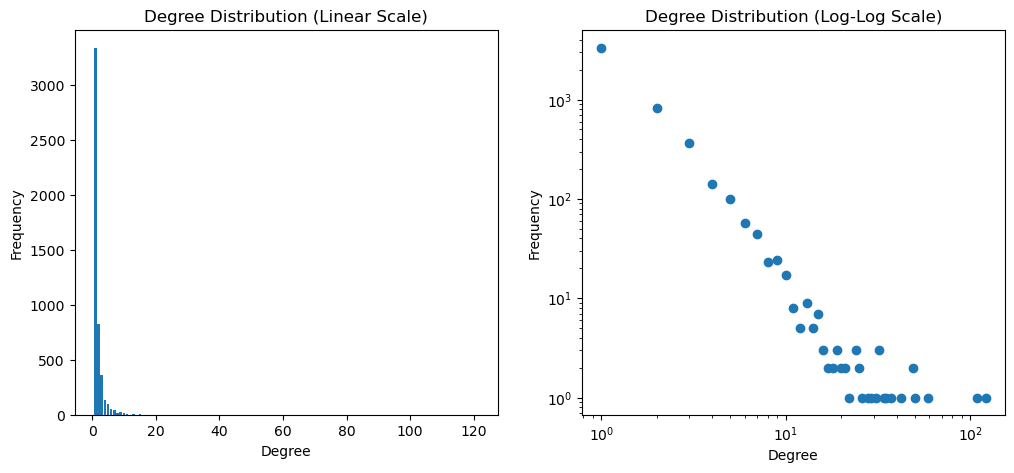

In [24]:
# Now, bin the degree distribution using numpy.histogram.
hist, bin_edges = np.histogram(degree_sequence, bins=range(dmin, (dmax+1) +1)) # +1 to include dmax as the right bin edge in the last bin

# Plot the distribution. Plot it with both linear and log-log axes.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

==TODO== comment on the plots

# Assignment 1.2: Stats and visualization of the Rock Music Network